# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

### Maldição de Dimensionalidade

A "maldição da dimensionalidade" é um fenômeno que ocorre quando lidamos com conjuntos de dados de alta dimensionalidade. Isso pode ter várias implicações negativas, incluindo:

    Espaço de características esparsas: Com o aumento da dimensionalidade, o espaço de características se torna cada vez mais "espalhado", o que significa que os pontos de dados tendem a se afastar uns dos outros. Isso pode levar a problemas de generalização, pois pode ser mais difícil para o modelo aprender padrões significativos nos dados.

    Custos computacionais elevados: Modelos de aprendizado de máquina podem se tornar mais lentos e exigir mais recursos computacionais à medida que o número de características aumenta. Isso ocorre porque o cálculo de distâncias ou a operação em espaços de alta dimensão é mais complexo.

    Overfitting: Com um grande número de características, os modelos podem se tornar excessivamente complexos e ter dificuldade em generalizar para novos dados, levando ao overfitting.

Para lidar com esses problemas, a redução de dimensionalidade é frequentemente aplicada. A redução de dimensionalidade é o processo de reduzir o número de variáveis ​​(ou características) em um conjunto de dados, enquanto mantém o máximo de informação possível. Duas técnicas comuns de redução de dimensionalidade são:

    PCA (Principal Component Analysis): O PCA é uma técnica que projeta os dados em um novo conjunto de coordenadas que são ortogonais entre si (chamadas de componentes principais). O PCA reorganiza as características de modo que as primeiras componentes principais contenham a maior parte da variância dos dados. Isso permite reduzir a dimensionalidade mantendo a maior parte da informação.

    Seleção de características: Esta técnica envolve selecionar um subconjunto das características originais do conjunto de dados. A seleção de características pode ser feita com base em várias métricas, como importância das características, correlação com a variável de saída, ou através de métodos automatizados.

Portanto, ao lidar com conjuntos de dados de alta dimensionalidade, a redução de dimensionalidade, como PCA ou seleção de características, pode ser útil para mitigar os problemas associados à maldição da dimensionalidade e melhorar o desempenho dos modelos de aprendizado de máquina.

### Overfitting

Não, o overfitting não é exclusivo de conjuntos de dados de alta dimensionalidade, mas é um fenômeno que pode ocorrer em uma variedade de cenários de modelagem de dados. O overfitting acontece quando um modelo se ajusta demais aos dados de treinamento, capturando não apenas os padrões verdadeiros nos dados, mas também o ruído aleatório ou peculiaridades específicas do conjunto de treinamento. Isso pode levar a uma queda no desempenho do modelo quando é aplicado a novos dados.

Embora o overfitting possa ser exacerbado por conjuntos de dados de alta dimensionalidade devido à maior complexidade do modelo, ele pode ocorrer em qualquer conjunto de dados, independentemente da dimensionalidade.Além disso, há várias razões pelas quais o overfitting pode ocorrer:

    Complexidade do Modelo: Modelos muito complexos podem ser capazes de se ajustar aos dados de treinamento com precisão excessiva, capturando padrões que não são generalizáveis para novos dados.

    Tamanho do Conjunto de Dados: Quando o conjunto de dados de treinamento é pequeno em relação à complexidade do modelo, pode haver poucos exemplos para aprender os padrões verdadeiros nos dados, levando a um ajuste excessivo.

    Ruído nos Dados: Se os dados contiverem ruído aleatório ou informações irrelevantes, o modelo pode aprender a ajustar-se a esse ruído, em vez de capturar os padrões verdadeiros nos dados.

    Viés de Seleção de Modelo: Se várias configurações de modelo forem testadas em um conjunto de dados e a seleção do modelo for baseada apenas no desempenho nos dados de treinamento (sem validação em dados de teste), pode ocorrer overfitting.

Portanto, o overfitting é um desafio comum em aprendizado de máquina e deve ser tratado cuidadosamente em todos os cenários de modelagem, não apenas em conjuntos de dados de alta dimensionalidade. Estratégias como validação cruzada, regularização, seleção de modelo e aumento de dados são comumente usadas para lidar com o overfitting e melhorar o desempenho do modelo em dados não vistos.

### Perceptron com muita acurácia em relação a outros

Aqui estão algumas possíveis razões para o Perceptron ter uma acurácia significativamente maior em comparação com os outros modelos:

    Sensibilidade à escala dos dados:
        O Perceptron pode ser sensível à escala dos dados. Se os dados não estiverem normalizados ou padronizados corretamente, isso pode afetar seu desempenho. Se o TF-IDF produziu uma matriz de termos com valores em uma escala adequada para o Perceptron, mas não para os outros modelos, isso poderia explicar a diferença de desempenho.

    Linearidade do problema:
        O Perceptron é um classificador linear simples que funciona bem em problemas de classificação linearmente separáveis. Se o problema de classificação dos dados for linearmente separável, o Perceptron pode ser capaz de encontrar uma fronteira de decisão eficaz com facilidade, enquanto outros modelos mais complexos podem não ser necessários.

    Capacidade de generalização:
        O Perceptron é um modelo simples com menor capacidade de memorização em comparação com modelos mais complexos, como Random Forest ou SVM. Isso pode ajudar na generalização para novos dados, evitando overfitting.

    Ruído nos dados:
        Se os dados contiverem ruído ou características irrelevantes, modelos mais complexos podem ser mais propensos a se ajustar a esse ruído, enquanto o Perceptron, sendo mais simples, pode ser mais resistente a isso.

    Tamanho do conjunto de dados:
        O desempenho dos modelos pode ser afetado pelo tamanho do conjunto de dados. Se o conjunto de dados é relativamente pequeno, modelos mais simples podem ter uma vantagem sobre modelos mais complexos devido à redução da possibilidade de overfitting.

É importante investigar mais detalhadamente esses pontos para entender completamente por que o Perceptron está superando os outros modelos. A análise de curvas de aprendizado, validação cruzada e inspeção dos dados podem fornecer insights adicionais sobre o desempenho dos modelos e possíveis áreas de melhoria.

### Melhores modelos para dados grandes e alta dimensionalidade

Com um conjunto de dados tão grande e com alta dimensionalidade, a escolha do melhor modelo dependerá de diversos fatores, como a natureza dos dados, a distribuição das classes, a quantidade de ruído nos dados e os recursos computacionais disponíveis. No entanto, aqui estão algumas opções que você pode considerar no scikit-learn:

    LinearSVC:
        O LinearSVC é um classificador de máquina de vetores de suporte linear que pode lidar bem com conjuntos de dados de alta dimensionalidade.
        Ele pode ser eficaz em espaços de características de grande escala e é conhecido por ter um desempenho rápido em conjuntos de dados grandes.

    SGDClassifier:
        O SGDClassifier é um classificador linear que utiliza gradiente descendente estocástico para treinamento.
        É uma escolha popular para classificação de grandes conjuntos de dados, pois pode lidar com altas dimensões e grandes quantidades de dados.

    RandomForestClassifier:
        O RandomForestClassifier é um classificador baseado em árvores de decisão que pode lidar com conjuntos de dados de alta dimensionalidade.
        Ele pode ser robusto em relação ao overfitting e é capaz de capturar relações não lineares nos dados.

    GradientBoostingClassifier:
        O GradientBoostingClassifier é um classificador baseado em árvores de decisão que utiliza o método de boosting para construir um modelo forte a partir de modelos fracos.
        Ele pode lidar com conjuntos de dados de alta dimensionalidade e pode ser muito poderoso em termos de precisão.

    Redes Neurais com MLPClassifier:
        Embora as redes neurais profundas sejam mais frequentemente associadas a conjuntos de dados de alta dimensionalidade, o MLPClassifier (Multi-layer Perceptron) no scikit-learn pode ser uma opção a ser considerada se você deseja explorar o potencial das redes neurais em seu conjunto de dados.

Essas são apenas algumas opções no scikit-learn que podem ser úteis para classificação em conjuntos de dados de alta dimensionalidade. É importante experimentar várias opções e ajustar os hiperparâmetros para encontrar o modelo que melhor se adapte aos seus dados e objetivos específicos. Além disso, considerar técnicas de pré-processamento, como redução de dimensionalidade, pode ser benéfico para lidar com conjuntos de dados tão grandes.

### Classification Report (Explicação)

O classification report do sklearn fornece métricas de desempenho de um modelo de classificação para cada classe do problema. Aqui está o que cada métrica significa:

    Precision (Precisão): A precisão é a proporção de exemplos classificados corretamente como positivos (classe 1) em relação ao total de exemplos classificados como positivos (verdadeiros positivos + falsos positivos). Em outras palavras, é a habilidade do modelo de não rotular uma amostra como positiva quando ela é negativa. Para a classe 0, a precisão é 0.97, o que significa que 97% dos exemplos classificados como classe 0 são realmente da classe 0. Para a classe 1, a precisão é 0.99, o que significa que 99% dos exemplos classificados como classe 1 são realmente da classe 1.

    Recall (Revocação): A revocação é a proporção de exemplos positivos (classe 1) que foram corretamente identificados pelo modelo em relação ao total de exemplos que realmente são positivos (verdadeiros positivos + falsos negativos). Em outras palavras, é a habilidade do modelo de encontrar todas as amostras positivas. Para a classe 0, a revocação é 1.00, o que significa que o modelo identifica corretamente todas as amostras da classe 0. Para a classe 1, a revocação é 0.95, o que significa que o modelo identifica corretamente 95% das amostras da classe 1.

    F1-score: O F1-score é a média harmônica entre precisão e revocação. Ele fornece uma única medida que equilibra a precisão e a revocação. Quanto mais próximo de 1, melhor o desempenho do modelo. Para a classe 0, o F1-score é 0.98, e para a classe 1, é 0.97.

    Support: O suporte é o número de ocorrências reais de cada classe no conjunto de dados de teste. Neste caso, há 3904 exemplos da classe 0 e 2218 exemplos da classe 1.

    Accuracy (Acurácia): A acurácia é a proporção de exemplos classificados corretamente em relação ao total de exemplos no conjunto de dados de teste. Em outras palavras, é a habilidade geral do modelo de classificar corretamente os exemplos. Neste caso, a acurácia é 0.98, o que significa que o modelo classificou corretamente 98% dos exemplos no conjunto de dados de teste.

    Macro avg e weighted avg: São as médias das métricas para todas as classes. No caso da macro avg, calcula-se a média sem levar em consideração o desequilíbrio das classes, enquanto na weighted avg, as classes são ponderadas de acordo com o número de exemplos de cada uma.

### Matriz Esparsa x Matriz Densa

No contexto de processamento de dados, como na vetorização TF-IDF em análise de texto, as matrizes esparsas e densas se referem a diferentes formas de representar dados tabulares, como uma matriz de termos e documentos.

    Matriz Esparsa:
        Uma matriz esparsa é aquela em que a maioria dos elementos é zero. Isso é comum em conjuntos de dados onde muitos elementos são irrelevantes ou ausentes. Em NLP, por exemplo, ao vetorizar um grande corpus de texto usando TF-IDF, muitas palavras podem estar ausentes em cada documento, resultando em uma matriz com muitos zeros. As estruturas de dados de matriz esparsa, como CSR (Compressed Sparse Row), CSC (Compressed Sparse Column) ou LIL (Lista de Listas), armazenam apenas os valores diferentes de zero e suas posições, economizando memória.
    Matriz Densa:
        Por outro lado, uma matriz densa é aquela em que a maioria dos elementos tem valores diferentes de zero. Todas as entradas são armazenadas, independentemente de serem zeros ou não. Matrizes densas são eficientes para operações matriciais e são usadas em muitos algoritmos de aprendizado de máquina. No entanto, elas podem consumir uma quantidade significativa de memória, especialmente para conjuntos de dados grandes.

A diferença fundamental entre as duas é a quantidade de memória necessária para armazenar os dados. As matrizes esparsas são mais eficientes em termos de memória quando a maioria dos elementos é zero, enquanto as matrizes densas são mais simples de manipular e podem ser mais eficientes em termos de desempenho para operações matriciais quando a maioria dos elementos é diferente de zero.

Ao trabalhar com algoritmos que suportam matrizes esparsas, como muitos algoritmos de aprendizado de máquina implementados em bibliotecas como scikit-learn, é preferível usar matrizes esparsas sempre que possível, especialmente em conjuntos de dados grandes e/ou de alta dimensionalidade, para economizar memória e melhorar o desempenho.

### Redução de Dimensionalidade

Redução de dimensionalidade é uma técnica utilizada para reduzir o número de características (ou dimensões) nos seus dados enquanto preserva o máximo de informação possível. Duas técnicas comuns para redução de dimensionalidade são a Análise de Componentes Principais (PCA) e a seleção de características.

1. Análise de Componentes Principais (PCA):
  * O PCA é uma técnica de redução de dimensionalidade que transforma os seus dados em um novo conjunto de coordenadas, onde as novas características (componentes principais) são combinações lineares das características originais. As componentes principais são ordenadas em ordem de importância, onde a primeira componente principal captura a maior variância nos dados, a segunda componente principal captura a segunda maior variância, e assim por diante.
  * Durante o treinamento do PCA, as componentes principais são calculadas a partir da matriz de covariância dos seus dados. Você pode escolher o número de componentes principais que deseja manter com base na quantidade de variância que deseja preservar nos dados.
  * O PCA é útil para reduzir a dimensionalidade dos dados, especialmente quando existem muitas características correlacionadas ou redundantes. Ele pode ajudar a simplificar a modelagem, reduzir o tempo de treinamento e evitar problemas como a maldição da dimensionalidade.

2. Seleção de Características:
  * A seleção de características é outra técnica de redução de dimensionalidade que envolve a seleção de um subconjunto das características originais do seu conjunto de dados. Isso pode ser feito manualmente, com base no conhecimento especializado sobre o domínio do problema, ou automaticamente, utilizando métodos estatísticos, heurísticas ou algoritmos de aprendizado de máquina.
  * Existem várias abordagens para selecionar características, incluindo métodos baseados em importância de características (como árvores de decisão ou Random Forests), métodos de filtragem que calculam estatísticas para cada característica individualmente, e métodos de wrapper que usam algoritmos de aprendizado de máquina para avaliar subconjuntos de características.

### TF-IDF e a Normalização

Sim, o TF-IDF (Term Frequency-Inverse Document Frequency) normaliza os valores dos termos nos documentos. Vamos entender como isso acontece:

* TF (Term Frequency): O TF mede a frequência de um termo em um documento. Ele é calculado dividindo o número de vezes que um termo aparece em um documento pelo número total de termos no documento. Isso normaliza a contagem de termos pelo comprimento do documento, o que ajuda a lidar com variações no tamanho dos documentos.

* IDF (Inverse Document Frequency): O IDF mede a raridade de um termo em um conjunto de documentos. Ele é calculado como o logaritmo do inverso da frequência do termo em todos os documentos. O IDF penaliza termos que aparecem em muitos documentos, dando maior peso aos termos que são mais exclusivos e informativos.

* Multiplicação TF-IDF: O valor TF-IDF de um termo em um documento é obtido multiplicando o TF pelo IDF correspondente. Isso significa que termos que ocorrem com frequência em um documento específico (alto TF) e são raros em outros documentos (alto IDF) terão um valor TF-IDF mais alto.

Essa multiplicação TF-IDF resulta em valores normalizados para cada termo em relação ao documento e ao conjunto de documentos. Portanto, os valores TF-IDF geralmente são considerados como medidas de importância relativa dos termos nos documentos, levando em conta tanto a frequência local (TF) quanto a raridade global (IDF) dos termos.

# Extras / Anotações de Códigos

### Matriz dos TF-IDF e em forma de array

In [3]:
#MATRIZ TF-IDF

#vectorizer = TfidfVectorizer(use_idf=True)
#X_vectorizer = vectorizer.fit_transform(X)
#print(X_vectorizer.toarray())
#feature_names = vectorizer.get_feature_names_out()
#df = pd.DataFrame(X_vectorizer.todense(), columns=feature_names)
#display(df)

In [4]:
#ARRAY TF-IDF

#print(X_vectorizer.todense())
#print(type(X_vectorizer.todense()))
#X_dense = np.asarray(X_vectorizer.todense())
#print(type(X_dense))

# Limpeza dos Dados

In [107]:
df = pd.read_csv('SQLiV3.csv', encoding='utf-8')

In [108]:
display(df)

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
30915,DELETE FROM tomorrow,0,NaN,NaN
30916,SELECT wide ( s ) FROM west,0,NaN,NaN
30917,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN


In [109]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3'])
display(df)

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [110]:
df.describe()

,Sentence,Label
count,30904,30664
unique,30872,42
top,#NAME?,0
freq,8,19268


In [111]:
df['Label'].isna().sum()

255

In [112]:
df = df.dropna()
df['Label'].isna().sum()

0

In [113]:
df.describe()

,Sentence,Label
count,30649,30649
unique,30627,28
top,#NAME?,0
freq,8,19268


In [114]:
display(df)

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [115]:
df[~df['Label'].isin(['0', '1'])]

,Sentence,Label
193,1,SELECT *
195,x' and 1 = ( select count ( * ) from...,--
204,\',desc users
251,23 or 1 = 1,--
264,&apos,OR
362,x' AND userid IS NULL,--
377,x' and members.email is NULL,--
409,) ),waitfor delay '0:0:__TIME__'--
420,1' and 1 = ( select count ( * ) from...,--
447,,drop table temp --


In [116]:
df = df[df['Label'].isin(['0', '1'])]
display(df)

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  object
dtypes: object(2)
memory usage: 717.4+ KB


In [118]:
df['Label'] = df['Label'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 717.4+ KB


### Countplot para verificar as quantidades em ambas as classes

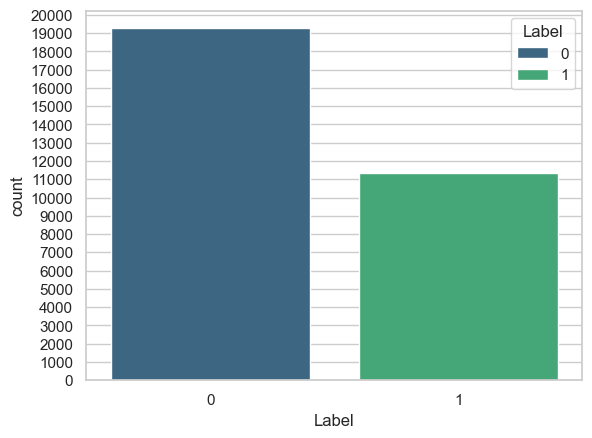

In [119]:
sns.countplot(x = 'Label', data=df, hue = 'Label', palette = 'viridis')
sns.set_theme(style="whitegrid")
plt.yticks(np.arange(0, 21000, 1000))
plt.show()

# Etapas do Treinamento

In [91]:
X = df['Sentence'].values
y = df['Label'].values

### Usando o TF-IDF para vetorizar os códigos de SQL

In [92]:
vectorizer = TfidfVectorizer(use_idf=True)
X_vectorizer = vectorizer.fit_transform(X)

#vectorizer = CountVectorizer(min_df = 100, max_df = 0.8, stop_words = 'english')
#X_vectorizer = vectorizer.fit_transform(X)

### SMOTE (Cria amostra sintéticas da menor classe para balancear)

In [52]:
quantidades = np.bincount(y)

print("Quantidade de 0s:", quantidades[0])
print("Quantidade de 1s:", quantidades[1])

smote = SMOTE(random_state=7)
X_vectorizer, y = smote.fit_resample(X_vectorizer, y)

quantidades = np.bincount(y)

print("\nQuantidade de 0s:", quantidades[0])
print("Quantidade de 1s:", quantidades[1])

Quantidade de 0s: 19268
Quantidade de 1s: 11341

Quantidade de 0s: 19268
Quantidade de 1s: 19268


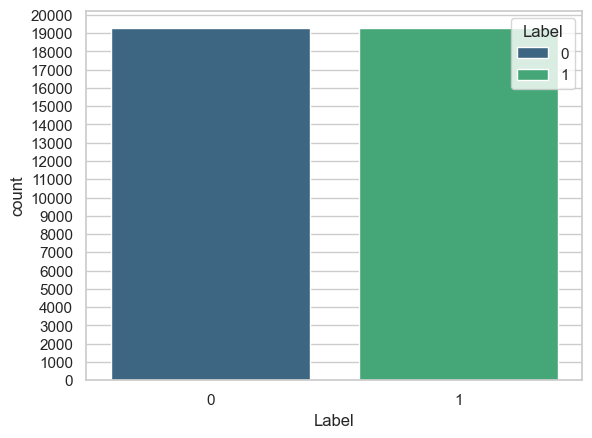

In [53]:
plot = pd.DataFrame(y, columns=["Label"])
sns.countplot(x = 'Label', data=plot, hue = 'Label', palette = 'viridis')
sns.set_theme(style="whitegrid")
plt.yticks(np.arange(0, 21000, 1000))
plt.show()

### Dividindo o dataset entre treinamento e teste

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorizer, y, test_size=0.2, random_state=7, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24487, 24660)
(6122, 24660)
(24487,)
(6122,)


### Select Feature (Seleciona as melhores colunas/features que possuem mais impactos nos pesos sinápticos)
A grosso modo, ele cria um modelo como cobaia (nesse caso o LinearSVC)\
para ver quais colunas/features são mais efetivas, retirando as que tem menos impacto\
Pode aumentar a acurácia se estiver evitando colunas que mais atrapalham do que ajudam\
Evitando ruídos por exemplo.

In [94]:
# Criar uma instância do classificador LinearSVC()
clf = LinearSVC()

# Treinar o classificador no seu conjunto de dados
clf.fit(X_train, y_train)

# Selecionar as características mais importantes
sfm = SelectFromModel(clf, threshold=0.40)   #0.40 / 0.90
sfm.fit(X_train, y_train)

# Aplicar a transformação às suas características
X_train = sfm.transform(X_train)
X_test = sfm.transform(X_test)

### O Truncated SVD reduz o números de colunas/características (Igual o PCA, mas esse é para matriz esparsas)

In [ ]:
# Inicialize o TruncatedSVD com o número desejado de componentes
svd = TruncatedSVD(n_components=2)

# Ajuste o TruncatedSVD aos seus dados de treinamento
X_train = svd.fit_transform(X_train)

# Aplique a transformação aos seus dados de teste
X_test = svd.transform(X_test)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30828, 24660)
(7708, 24660)
(30828,)
(7708,)


In [66]:
seed = 7

### 1º Treinamento do Random Forest (Com SMOTE e sem FEATURE SELECTION)

In [23]:
model_rf = RandomForestClassifier(n_estimators = 50, random_state = seed).fit(X_train, y_train)
print(model_rf.score(X_test, y_test), '\n')
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

0.8220031136481578 

              precision    recall  f1-score   support

           0       1.00      0.64      0.78      3853
           1       0.74      1.00      0.85      3855

    accuracy                           0.82      7708
   macro avg       0.87      0.82      0.82      7708
weighted avg       0.87      0.82      0.82      7708



[[2485 1368]
 [   4 3851]]


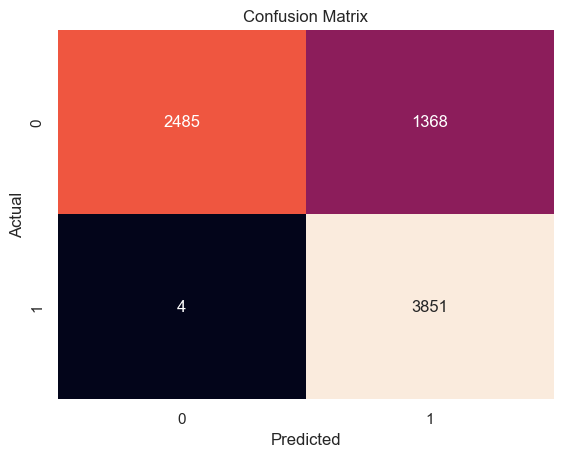

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Curvas de Aprendizado

Curvas de aprendizado mostram como a performance do modelo muda com o tamanho do conjunto de dados de treinamento. Plotar essas curvas pode ajudar a visualizar se o modelo está overfitting.
* Curva de Treinamento vs. Curva de Validação: Se a curva de treinamento continua melhorando enquanto a curva de validação estagna ou piora, isso é um sinal de overfitting.

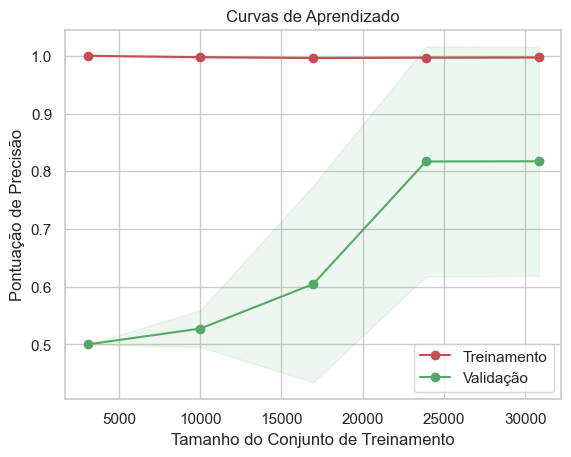

In [26]:
train_sizes, train_scores, test_scores = learning_curve(model_rf, X_vectorizer, y, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Treinamento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validação')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação de Precisão')
plt.title('Curvas de Aprendizado')
plt.legend(loc='best')
plt.show()

### Comparar a Performance nos Dados de Treinamento e Teste

Uma das maneiras mais diretas de verificar o overfitting é comparar a performance do modelo nos dados de treinamento e nos dados de teste (ou validação). Alta Performance nos Dados de Treinamento e Baixa Performance nos Dados de Teste: Se o modelo tem uma precisão alta nos dados de treinamento, mas uma precisão significativamente menor nos dados de teste, isso é um sinal claro de overfitting.

In [27]:
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Acurácia do Treinamento: {train_accuracy}")
print(f"Acurácia do Teste: {test_accuracy}")
print(f"Diferença de acurácia: {train_accuracy - test_accuracy}")

Acurácia do Treinamento: 0.9965940054495913
Acurácia do Teste: 0.8220031136481578
Diferença de acurácia: 0.1745908918014335


### Medindo a precisão usando validação cruzada (Cross-Validation)
A validação cruzada ajuda a avaliar o desempenho do modelo de forma mais robusta, dividindo os dados em vários subconjuntos (folds) e treinando e testando o modelo em diferentes combinações desses subconjuntos. Isso fornece uma estimativa mais precisa do desempenho do modelo e pode revelar problemas de overfitting. Métricas de Validação Cruzada: Se o desempenho médio em validação cruzada for significativamente inferior ao desempenho nos dados de treinamento, isso pode indicar overfitting.

In [28]:
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Validação Cruzada Scores: {scores}")
print(f"Média da Validação Cruzada: {scores.mean()}")

Validação Cruzada Scores: [0.82841388 0.83214402 0.82776516 0.82449311 0.82887267]
Média da Validação Cruzada: 0.8283377672972602


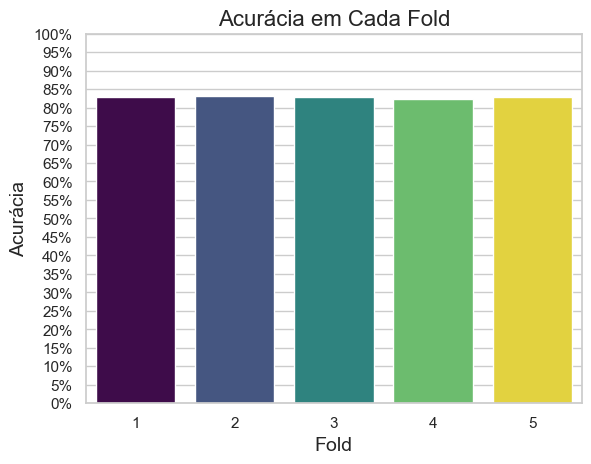

In [29]:
df = pd.DataFrame({'Fold': range(1, 6), 'Accuracy': scores})

sns.set_theme(style="whitegrid")
bar_plot = sns.barplot(x='Fold', y='Accuracy', data=df, hue='Fold', palette='viridis', errorbar=None, legend=False)
plt.gca().set_yticks([i / 100 for i in range(100, -1, -5)])
plt.gca().set_yticklabels([f'{i}%' for i in range(100, -1, -5)])
plt.title('Acurácia em Cada Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.show()

In [30]:
y_train_pred = cross_val_predict(model_rf, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)

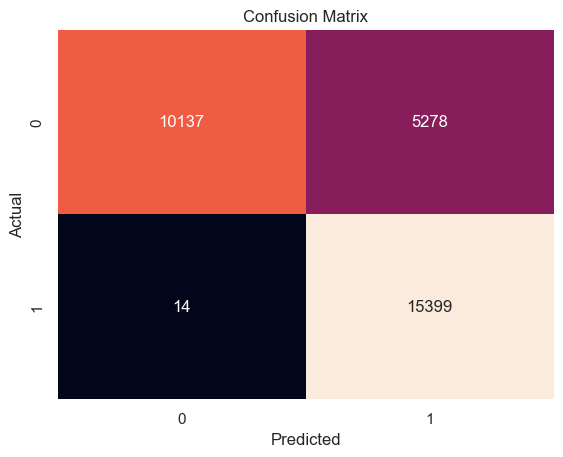

In [31]:
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
sns.set_theme(style="whitegrid")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### A curva ROC é uma ferramenta útil para avaliar o desempenho de um modelo de classificação binária, especialmente quando se lida com problemas desbalanceados

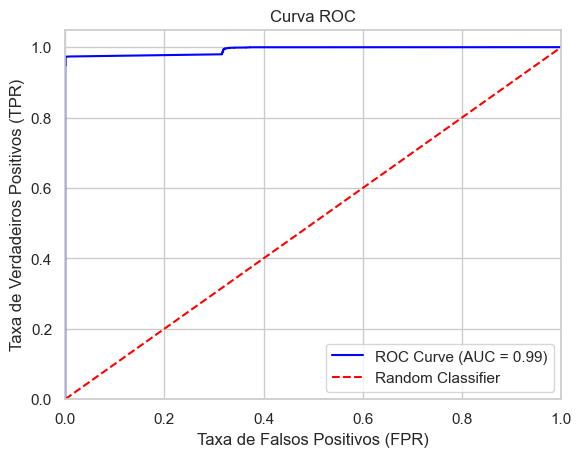

In [32]:
#y_scores = model_rf.predict_proba(X_test)[:, 1]
##fpr, tpr, thresholds = roc_curve(y_test, y_scores)
#roc_auc = roc_auc_score(y_test, y_scores)

#plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='red', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('Falso Positivo')
#plt.ylabel('Verdadeiro Positivo')
#plt.title('Curva ROC')
#plt.legend(loc='lower right')
#plt.grid(True)
#plt.show()

y_proba = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 2º Treinamento do Random Forest (Com SMOTE e Com FEATURE SELECTION)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30828, 6097)
(7708, 6097)
(30828,)
(7708,)


In [56]:
model_rf = RandomForestClassifier(n_estimators = 50, random_state = seed).fit(X_train, y_train)
print(model_rf.score(X_test, y_test), '\n')
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

0.994940321743643 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3853
           1       1.00      0.99      0.99      3855

    accuracy                           0.99      7708
   macro avg       0.99      0.99      0.99      7708
weighted avg       0.99      0.99      0.99      7708



[[3844    9]
 [  30 3825]]


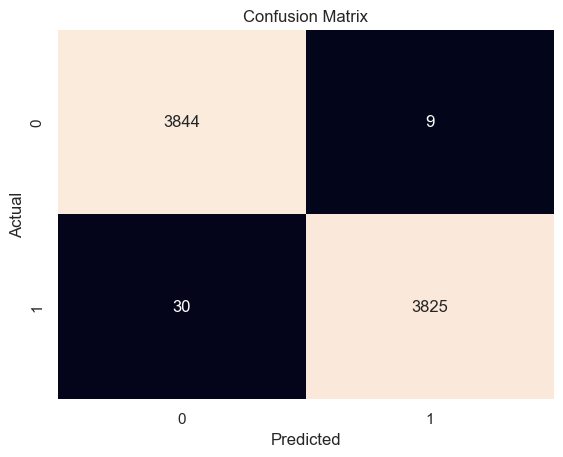

In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Curvas de Aprendizado

Curvas de aprendizado mostram como a performance do modelo muda com o tamanho do conjunto de dados de treinamento. Plotar essas curvas pode ajudar a visualizar se o modelo está overfitting.
* Curva de Treinamento vs. Curva de Validação: Se a curva de treinamento continua melhorando enquanto a curva de validação estagna ou piora, isso é um sinal de overfitting.

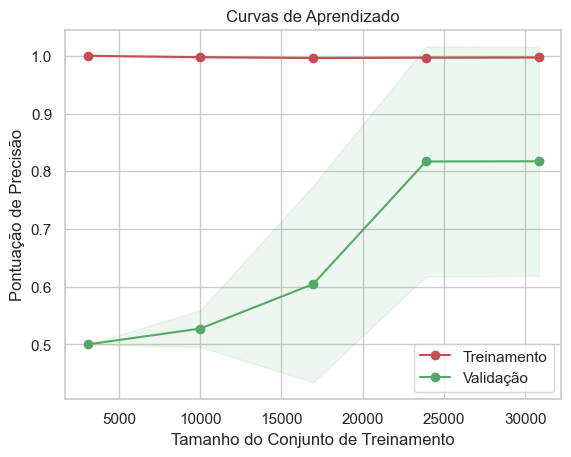

In [59]:
train_sizes, train_scores, test_scores = learning_curve(model_rf, X_vectorizer, y, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Treinamento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validação')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação de Precisão')
plt.title('Curvas de Aprendizado')
plt.legend(loc='best')
plt.show()

### Comparar a Performance nos Dados de Treinamento e Teste

Uma das maneiras mais diretas de verificar o overfitting é comparar a performance do modelo nos dados de treinamento e nos dados de teste (ou validação). Alta Performance nos Dados de Treinamento e Baixa Performance nos Dados de Teste: Se o modelo tem uma precisão alta nos dados de treinamento, mas uma precisão significativamente menor nos dados de teste, isso é um sinal claro de overfitting.

In [60]:
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Acurácia do Treinamento: {train_accuracy}")
print(f"Acurácia do Teste: {test_accuracy}")
print(f"Diferença de acurácia: {train_accuracy - test_accuracy}")

Acurácia do Treinamento: 0.9968535097962891
Acurácia do Teste: 0.994940321743643
Diferença de acurácia: 0.0019131880526460643


### Medindo a precisão usando validação cruzada (Cross-Validation)
A validação cruzada ajuda a avaliar o desempenho do modelo de forma mais robusta, dividindo os dados em vários subconjuntos (folds) e treinando e testando o modelo em diferentes combinações desses subconjuntos. Isso fornece uma estimativa mais precisa do desempenho do modelo e pode revelar problemas de overfitting. Métricas de Validação Cruzada: Se o desempenho médio em validação cruzada for significativamente inferior ao desempenho nos dados de treinamento, isso pode indicar overfitting.

In [61]:
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Validação Cruzada Scores: {scores}")
print(f"Média da Validação Cruzada: {scores.mean()}")

Validação Cruzada Scores: [0.99464807 0.99335063 0.99513461 0.99529603 0.99480941]
Média da Validação Cruzada: 0.9946477491220858


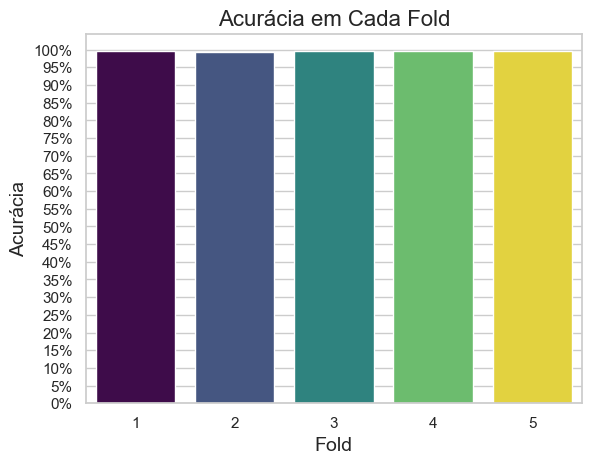

In [62]:
df = pd.DataFrame({'Fold': range(1, 6), 'Accuracy': scores})

sns.set_theme(style="whitegrid")
bar_plot = sns.barplot(x='Fold', y='Accuracy', data=df, hue='Fold', palette='viridis', errorbar=None, legend=False)
plt.gca().set_yticks([i / 100 for i in range(100, -1, -5)])
plt.gca().set_yticklabels([f'{i}%' for i in range(100, -1, -5)])
plt.title('Acurácia em Cada Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.show()

In [63]:
y_train_pred = cross_val_predict(model_rf, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)

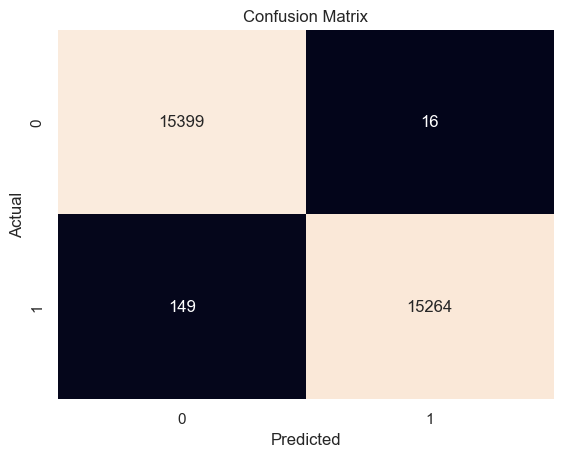

In [64]:
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
sns.set_theme(style="whitegrid")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### A curva ROC é uma ferramenta útil para avaliar o desempenho de um modelo de classificação binária, especialmente quando se lida com problemas desbalanceados

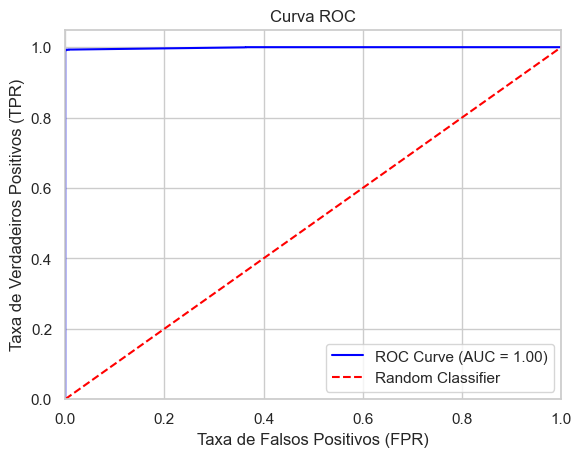

In [65]:
#y_scores = model_rf.predict_proba(X_test)[:, 1]
##fpr, tpr, thresholds = roc_curve(y_test, y_scores)
#roc_auc = roc_auc_score(y_test, y_scores)

#plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='red', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('Falso Positivo')
#plt.ylabel('Verdadeiro Positivo')
#plt.title('Curva ROC')
#plt.legend(loc='lower right')
#plt.grid(True)
#plt.show()

y_proba = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 3º Treinamento do Random Forest (Com SMOTE e Com FEATURE SELECTION e setando Max_Depth e Trees)

### Inicialização dos parâmetros para o treinamento do Random Forest

In [67]:
trees = 25
seed = 7
depth = 110

In [68]:
model_rf = RandomForestClassifier(max_depth=depth, n_estimators = trees, random_state = seed).fit(X_train, y_train)
print(model_rf.score(X_test, y_test), '\n')
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

0.9940321743642968 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3853
           1       1.00      0.99      0.99      3855

    accuracy                           0.99      7708
   macro avg       0.99      0.99      0.99      7708
weighted avg       0.99      0.99      0.99      7708



[[3848    5]
 [  41 3814]]


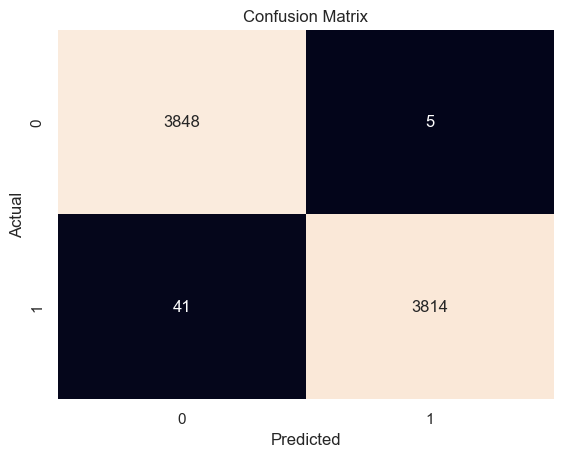

In [69]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Curvas de Aprendizado

Curvas de aprendizado mostram como a performance do modelo muda com o tamanho do conjunto de dados de treinamento. Plotar essas curvas pode ajudar a visualizar se o modelo está overfitting.
* Curva de Treinamento vs. Curva de Validação: Se a curva de treinamento continua melhorando enquanto a curva de validação estagna ou piora, isso é um sinal de overfitting.

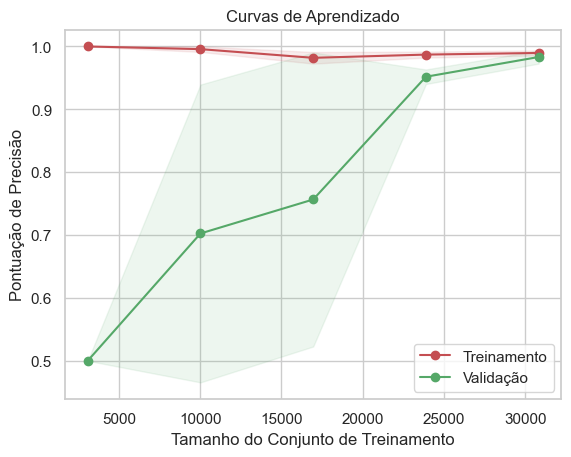

In [70]:
train_sizes, train_scores, test_scores = learning_curve(model_rf, X_vectorizer, y, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Treinamento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validação')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação de Precisão')
plt.title('Curvas de Aprendizado')
plt.legend(loc='best')
plt.show()

### Comparar a Performance nos Dados de Treinamento e Teste

Uma das maneiras mais diretas de verificar o overfitting é comparar a performance do modelo nos dados de treinamento e nos dados de teste (ou validação). Alta Performance nos Dados de Treinamento e Baixa Performance nos Dados de Teste: Se o modelo tem uma precisão alta nos dados de treinamento, mas uma precisão significativamente menor nos dados de teste, isso é um sinal claro de overfitting.

In [71]:
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Acurácia do Treinamento: {train_accuracy}")
print(f"Acurácia do Teste: {test_accuracy}")
print(f"Diferença de acurácia: {train_accuracy - test_accuracy}")

Acurácia do Treinamento: 0.9944855326326716
Acurácia do Teste: 0.9940321743642968
Diferença de acurácia: 0.00045335826837478166


### Medindo a precisão usando validação cruzada (Cross-Validation)
A validação cruzada ajuda a avaliar o desempenho do modelo de forma mais robusta, dividindo os dados em vários subconjuntos (folds) e treinando e testando o modelo em diferentes combinações desses subconjuntos. Isso fornece uma estimativa mais precisa do desempenho do modelo e pode revelar problemas de overfitting. Métricas de Validação Cruzada: Se o desempenho médio em validação cruzada for significativamente inferior ao desempenho nos dados de treinamento, isso pode indicar overfitting.

In [72]:
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Validação Cruzada Scores: {scores}")
print(f"Média da Validação Cruzada: {scores.mean()}")

Validação Cruzada Scores: [0.99399935 0.99140448 0.99367499 0.99351176 0.99334955]
Média da Validação Cruzada: 0.9931880266400865


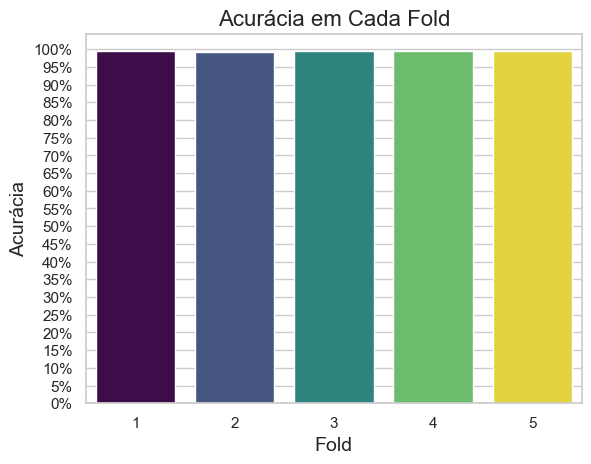

In [73]:
df = pd.DataFrame({'Fold': range(1, 6), 'Accuracy': scores})

sns.set_theme(style="whitegrid")
bar_plot = sns.barplot(x='Fold', y='Accuracy', data=df, hue='Fold', palette='viridis', errorbar=None, legend=False)
plt.gca().set_yticks([i / 100 for i in range(100, -1, -5)])
plt.gca().set_yticklabels([f'{i}%' for i in range(100, -1, -5)])
plt.title('Acurácia em Cada Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.show()

In [74]:
y_train_pred = cross_val_predict(model_rf, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)

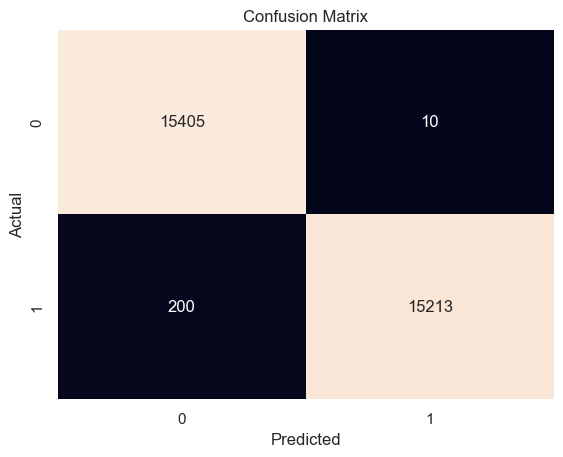

In [75]:
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
sns.set_theme(style="whitegrid")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### A curva ROC é uma ferramenta útil para avaliar o desempenho de um modelo de classificação binária, especialmente quando se lida com problemas desbalanceados

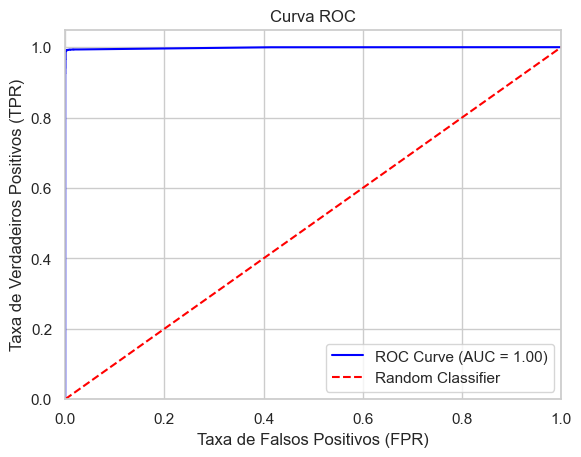

In [76]:
#y_scores = model_rf.predict_proba(X_test)[:, 1]
##fpr, tpr, thresholds = roc_curve(y_test, y_scores)
#roc_auc = roc_auc_score(y_test, y_scores)

#plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='red', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('Falso Positivo')
#plt.ylabel('Verdadeiro Positivo')
#plt.title('Curva ROC')
#plt.legend(loc='lower right')
#plt.grid(True)
#plt.show()

y_proba = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 4º Treinamento do Random Forest (Sem SMOTE e Com FEATURE SELECTION e setando Max_Depth e Trees)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24487, 1742)
(6122, 1742)
(24487,)
(6122,)


In [96]:
trees = 25
seed = 7
depth = 110

In [97]:
model_rf = RandomForestClassifier(max_depth=depth, n_estimators = trees, random_state = seed).fit(X_train, y_train)
print(model_rf.score(X_test, y_test), '\n')
y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

0.9949362953283241 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3904
           1       1.00      0.99      0.99      2218

    accuracy                           0.99      6122
   macro avg       1.00      0.99      0.99      6122
weighted avg       0.99      0.99      0.99      6122



[[3899    5]
 [  26 2192]]


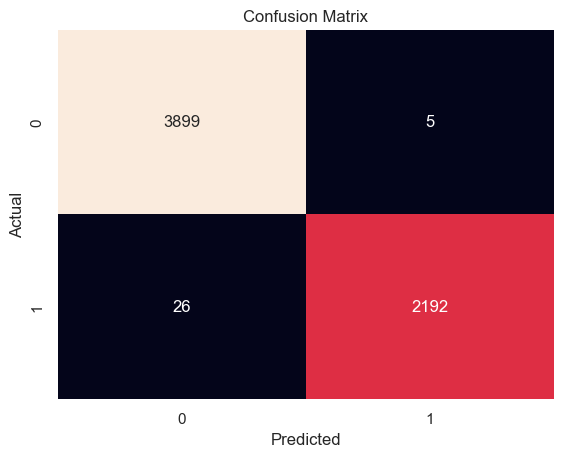

In [98]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Curvas de Aprendizado

Curvas de aprendizado mostram como a performance do modelo muda com o tamanho do conjunto de dados de treinamento. Plotar essas curvas pode ajudar a visualizar se o modelo está overfitting.
* Curva de Treinamento vs. Curva de Validação: Se a curva de treinamento continua melhorando enquanto a curva de validação estagna ou piora, isso é um sinal de overfitting.

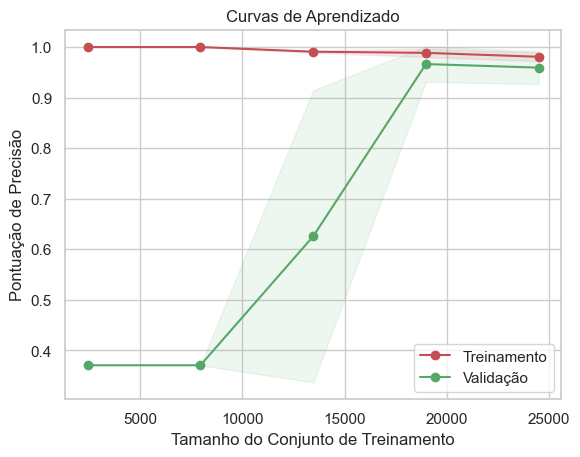

In [99]:
train_sizes, train_scores, test_scores = learning_curve(model_rf, X_vectorizer, y, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Treinamento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validação')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação de Precisão')
plt.title('Curvas de Aprendizado')
plt.legend(loc='best')
plt.show()

### Comparar a Performance nos Dados de Treinamento e Teste

Uma das maneiras mais diretas de verificar o overfitting é comparar a performance do modelo nos dados de treinamento e nos dados de teste (ou validação). Alta Performance nos Dados de Treinamento e Baixa Performance nos Dados de Teste: Se o modelo tem uma precisão alta nos dados de treinamento, mas uma precisão significativamente menor nos dados de teste, isso é um sinal claro de overfitting.

In [100]:
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Acurácia do Treinamento: {train_accuracy}")
print(f"Acurácia do Teste: {test_accuracy}")
print(f"Diferença de acurácia: {train_accuracy - test_accuracy}")

Acurácia do Treinamento: 0.9965696083636215
Acurácia do Teste: 0.9949362953283241
Diferença de acurácia: 0.0016333130352974568


### Medindo a precisão usando validação cruzada (Cross-Validation)
A validação cruzada ajuda a avaliar o desempenho do modelo de forma mais robusta, dividindo os dados em vários subconjuntos (folds) e treinando e testando o modelo em diferentes combinações desses subconjuntos. Isso fornece uma estimativa mais precisa do desempenho do modelo e pode revelar problemas de overfitting. Métricas de Validação Cruzada: Se o desempenho médio em validação cruzada for significativamente inferior ao desempenho nos dados de treinamento, isso pode indicar overfitting.

In [101]:
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Validação Cruzada Scores: {scores}")
print(f"Média da Validação Cruzada: {scores.mean()}")

Validação Cruzada Scores: [0.99407922 0.99489588 0.99448642 0.99509904 0.99448642]
Média da Validação Cruzada: 0.9946093945235093


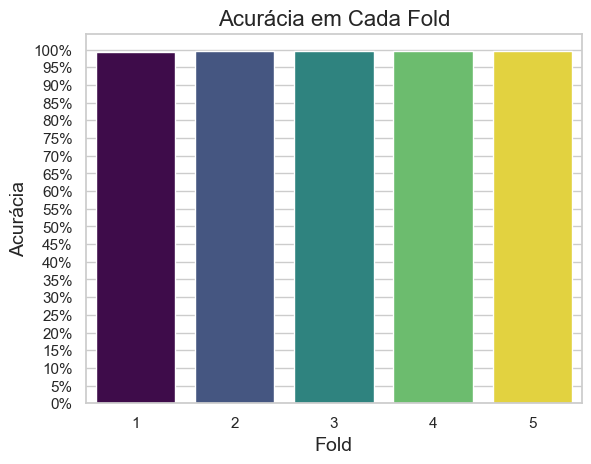

In [102]:
df = pd.DataFrame({'Fold': range(1, 6), 'Accuracy': scores})

sns.set_theme(style="whitegrid")
bar_plot = sns.barplot(x='Fold', y='Accuracy', data=df, hue='Fold', palette='viridis', errorbar=None, legend=False)
plt.gca().set_yticks([i / 100 for i in range(100, -1, -5)])
plt.gca().set_yticklabels([f'{i}%' for i in range(100, -1, -5)])
plt.title('Acurácia em Cada Fold', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Acurácia', fontsize=14)
plt.show()

In [103]:
y_train_pred = cross_val_predict(model_rf, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)

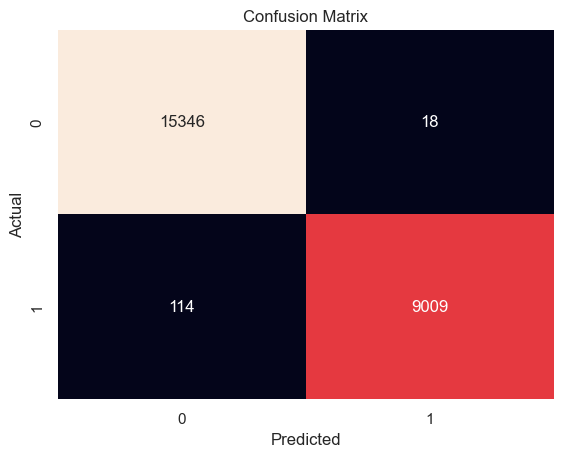

In [104]:
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
sns.set_theme(style="whitegrid")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### A curva ROC é uma ferramenta útil para avaliar o desempenho de um modelo de classificação binária, especialmente quando se lida com problemas desbalanceados

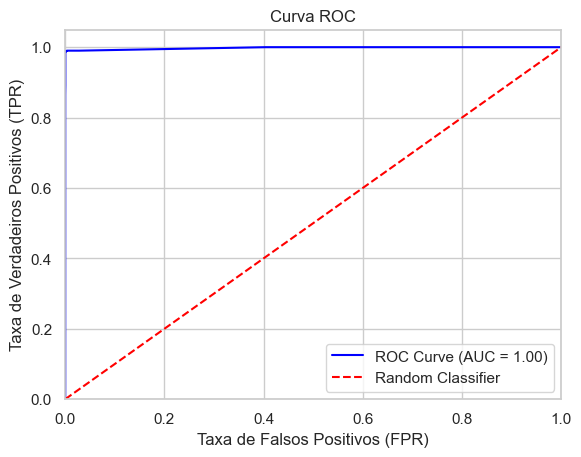

In [105]:
#y_scores = model_rf.predict_proba(X_test)[:, 1]
##fpr, tpr, thresholds = roc_curve(y_test, y_scores)
#roc_auc = roc_auc_score(y_test, y_scores)

#plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='red', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('Falso Positivo')
#plt.ylabel('Verdadeiro Positivo')
#plt.title('Curva ROC')
#plt.legend(loc='lower right')
#plt.grid(True)
#plt.show()

y_proba = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Próximos Passos

1. Outliers (Se vai ser antes ou depois do SMOTE e entender sobre)
2. Explicar porque técnicas com regularização (L1 e L2) e normalização não se usam no Random Forest
3. Melhorar os hiperparâmetros
4. Entender melhor o ROC
5. Estudar internamente sobre o Ramdom Forest
6. Estudar temas que não ficaram muito claro
7. Avaliar pontos negativos e impactos do SMOTE (FIZ ALGO PARECIDO)
8. Conferir a matriz de confusão
9. Pandas_profiling
10. Verificar códigos em Kaggle e Artigos
11. Verificar se para o random forest existe validation loss (NÃO EXISTE ESSA MÈTRICA)
12. Verificar se tem como aumentar o eixo x do gráfico de validação
13. Verificar o stopwords (SQL Injection)
14. Verificar o embeddings (SQL Injection)
15. Analisar o problema de Dimensionalidade (SQL Injection)
16. Plot trees
17. Export graphviz
18. clf.feature_importances_
19. Parar a divisão se não melhorar a divisão (gini impureza)
20. Analisar Variância
21. Verificar se existe alguma forma de analisar a correlação com o alvo

# Modelo de Treinamento Final

In [120]:
X = df['Sentence'].values
y = df['Label'].values

TF_IDF = TfidfVectorizer(use_idf=True)
X_vectorizer = TF_IDF.fit_transform(X)

Smote = SMOTE(random_state=7)
X_vectorizer, y = Smote.fit_resample(X_vectorizer, y)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorizer, y, test_size=0.2, random_state=7)

print(X_train.shape)

pipeline = Pipeline([
    ('sfm', SelectFromModel(LinearSVC(), threshold=0.40)),
    ('classifier', RandomForestClassifier(n_estimators = 50, random_state = 7))
])

pipeline.fit(X_train, y_train)

(30828, 24660)


Pipeline(steps=[('sfm', SelectFromModel(estimator=LinearSVC(), threshold=0.4)),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, random_state=7))])

In [122]:
print(classification_report(y_test, pipeline.predict(X_test)))
print(pipeline.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3853
           1       1.00      0.99      0.99      3855

    accuracy                           0.99      7708
   macro avg       0.99      0.99      0.99      7708
weighted avg       0.99      0.99      0.99      7708

0.994940321743643


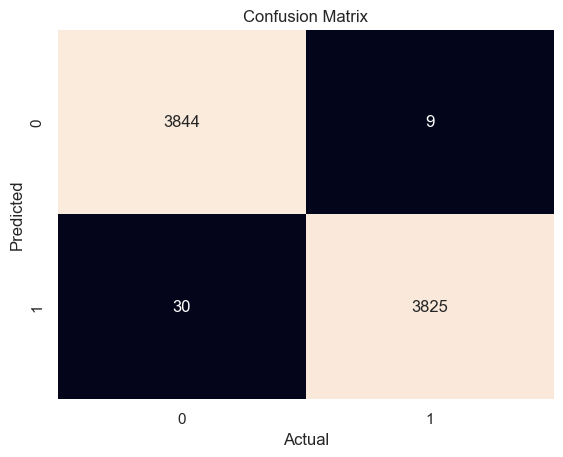

In [123]:
cm = confusion_matrix(y_test, pipeline.predict(X_test))

# Plotar matriz de confusão usando Seaborn
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [124]:
frase1 = "SELECT nome, idade, cidade FROM clientes WHERE cidade = 'São Paulo';"
frase2 = "SELECT * FROM produtos WHERE desconto > 20;"
frase3 = "SELECT COUNT(*) FROM pedidos WHERE cliente_id = 10"
frase4 = "SELECT * FROM carros WHERE ano_fabricacao BETWEEN 2018 AND 2022"
frase5 = "SELECT * FROM funcionarios WHERE data_contratacao >= DATE_SUB(NOW(), INTERVAL 1 MONTH)"

frase6 = "SELECT table_name FROM information_schema.tables"
frase7 = "OR 3409=3409 AND ('pytW' LIKE 'pytW"
frase8 = "RLIKE (SELECT (CASE WHEN (4346=4346) THEN 0x61646d696e ELSE 0x28 END)) AND 'Txws'='"
frase9 = "AND (SELECT * FROM (SELECT(SLEEP(5)))bAKL) AND 'vRxe'='vRxe"
frase10 = "AND 2947=LIKE('ABCDEFG',UPPER(HEX(RANDOMBLOB(1000000000/2))))"
frase11= ",(select * from (select(sleep(10)))a)%2c(select%20*%20from%20(select(sleep(10)))a)';WAITFOR DELAY '0:0:30'--"
frase12 = "@@VERSION,SLEEP(5),USER(),BENCHMARK(1000000,MD5('A')),5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30"

extra1 = "select * from carros c1 natural join ( " + \
         "select c2.cod_carro, count(c2.cod_carro) as qtd_vendidos " + \
         "from vendas v1 natural join carros c2 " + \
         "where data_venda > '2010/01/01' and data_venda < '2015/01/01' " + \
         "group by c2.cod_carro) t1 where qtd_vendidos = ( " + \
         "select max(qtd_vendidos) from ( " + \
         "select count(c3.cod_carro) as qtd_vendidos " + \
         "from vendas v2 natural join carros c3 " + \
         "where data_venda > '2010/01/01' and data_venda < '2015/01/01' " + \
         "group by c3.cod_carro) t2);"

extra2 = "select * from carros c1 natural join"

extra3 = "select c2.cod_carro, count(c2.cod_carro) as qtd_vendidos " + \
         "from vendas v1 natural join carros c2 " + \
         "where data_venda > '2010/01/01' and data_venda < '2015/01/01' " + \
         "group by c2.cod_carro"

extra4 = "select v.id, v.CPF_cliente, v.cod_carro, c.ano from vendas v, carros c " + \
         "where (v.CPF_cliente, v.cod_carro) not in " + \
         "(select t.CPF_cliente, t.cod_carro_antigo cod_carro from trocas t) " + \
         "and c.cod_carro = v.cod_carro and c.ano <= 2013;"

extra5 = "select f.CPF_funcionario, f.nome, qtd_vendas " + \
         "from funcionarios f natural join ( " + \
         "select f.CPF_funcionario, count(c.CPF_cliente) qtd_vendas " + \
         "from funcionarios f join clientes c on f.CPF_funcionario = c.CPF_funcionario " + \
         "join vendas v on c.CPF_cliente = v.CPF_cliente group by f.CPF_funcionario) t1 " + \
         "where qtd_vendas = (select max(qtd_vendas) max from ( " + \
         "select f.CPF_funcionario, count(c.CPF_cliente) qtd_vendas " + \
         "from funcionarios f join clientes c on f.CPF_funcionario = c.CPF_funcionario " + \
         "join vendas v on c.CPF_cliente = v.CPF_cliente group by f.CPF_funcionario) t2);"

extra6 = "' or 1=1 --"

extra7 = "DELETE FROM tomorrow"

frase_vetorizada = TF_IDF.transform([extra1])
previsao = pipeline.predict(frase_vetorizada)
print("Previsão:", previsao[0])

Previsão: 0


In [127]:
frase_esta_no_dataframe = df['Sentence'].str.contains(extra1, regex=False).any()

if frase_esta_no_dataframe:
    print("A frase está presente no DataFrame.")
else:
    print("A frase não está presente no DataFrame.")

A frase não está presente no DataFrame.
